In [ ]:
#1. Data cleaning including missing values, outliers and multi-collinearity. 

In [5]:
import pandas as pd
df=pd.read_csv("fraud.csv")

In [2]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [3]:
# Let's calculate the percentage of each job status category.
df.job.value_counts(normalize=True)

#plot the bar graph of percentage job categories
df.job.value_counts(normalize=True).plot.barh()
plt.show()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

<AxesSubplot:>

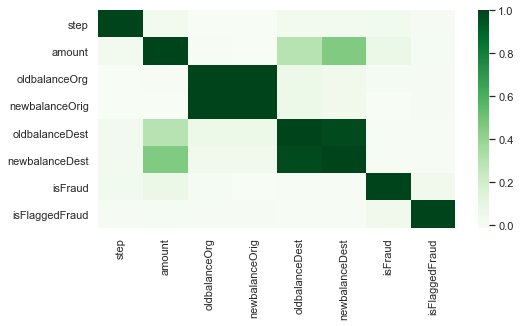

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),cmap='Greens',annot=False)

In [2]:
!pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [ ]:
import seaborn as sns
cols = df.columns[:11] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:>

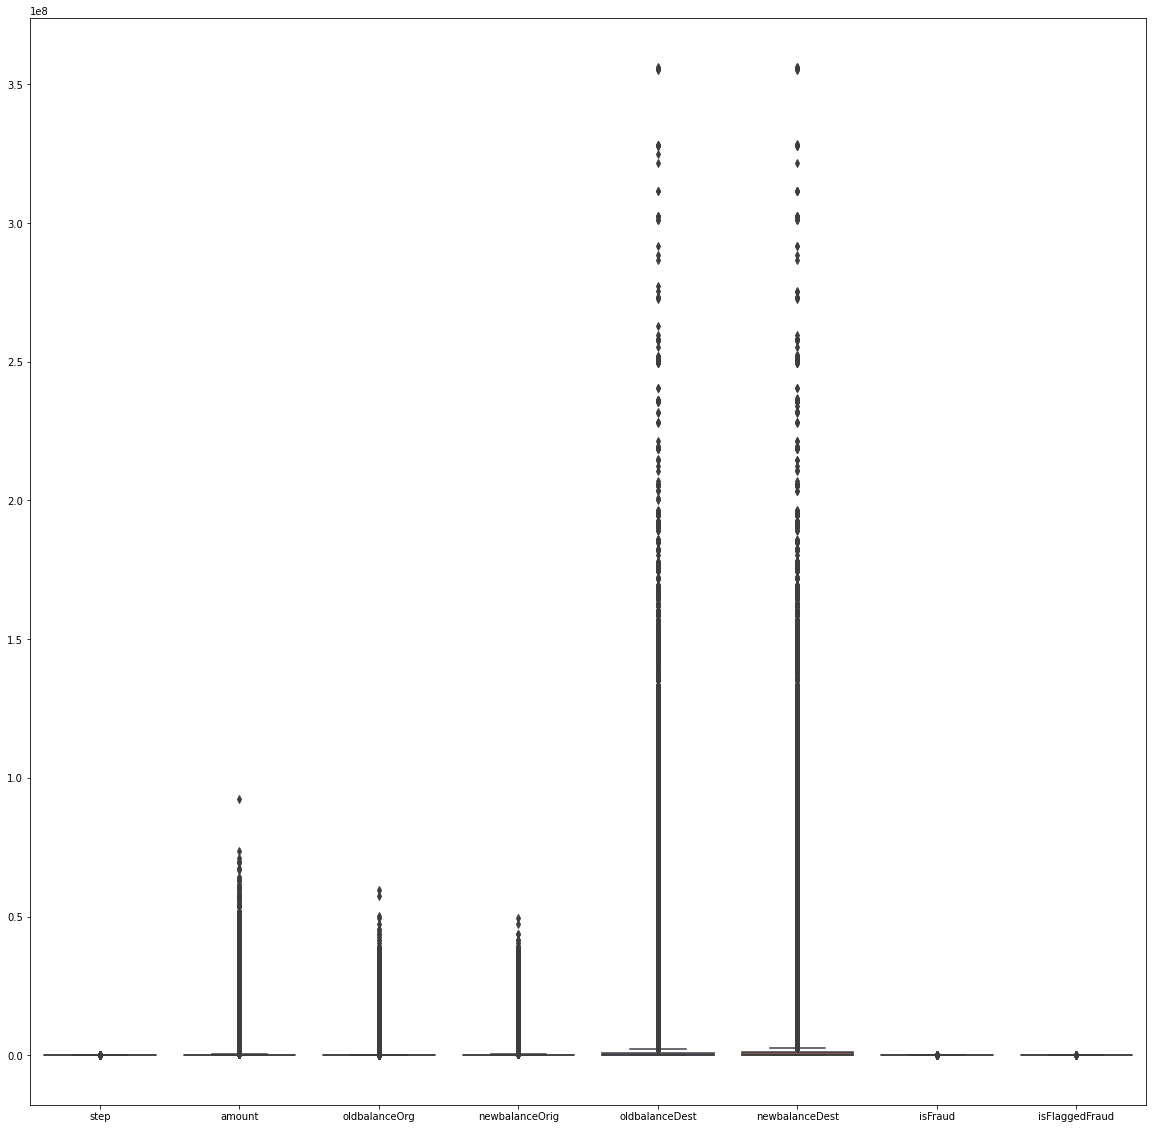

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.boxplot(data=df)

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
data = pd.get_dummies(df, columns = ['type'])
print(data)

         step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     9839.64  C1231006815      170136.00       160296.36   
1           1     1864.28  C1666544295       21249.00        19384.72   
2           1      181.00  C1305486145         181.00            0.00   
3           1      181.00   C840083671         181.00            0.00   
4           1    11668.14  C2048537720       41554.00        29885.86   
...       ...         ...          ...            ...             ...   
6362615   743   339682.13   C786484425      339682.13            0.00   
6362616   743  6311409.28  C1529008245     6311409.28            0.00   
6362617   743  6311409.28  C1162922333     6311409.28            0.00   
6362618   743   850002.52  C1685995037      850002.52            0.00   
6362619   743   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0        M1979787155            0.00      

In [5]:
data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


In [8]:
 df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

In [ ]:
# The target variable which we would like to predict, is the 'Class' variable
target = 'isFraud'

In [ ]:
# Data enGG

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

In [5]:
# distribution of anomalous features
features = data.iloc[:,1:5].columns

In [6]:
features

Index(['amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig'], dtype='object')

In [30]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:

# The target variable which we would like to predict, is the 'Class' variable
target = 'isFraud'
# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
Y = data[target]

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [11]:
# Define the model
model = LogisticRegression()



In [12]:
# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)


In [13]:

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, Y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], Y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], Y.iloc[test_indices]
    
   

In [13]:
 X_train

,amount,nameOrig,oldbalanceOrg,newbalanceOrig
4155069,104111.22,C168483909,107659.00,3547.78
4242628,127254.33,C570967983,287396.86,160142.53
2250465,218002.93,C1555022250,739510.62,957513.55
964395,352342.90,C867630203,0.00,0.00
3917208,87188.98,C510256404,5695852.43,5783041.40
...,...,...,...,...
6319334,463475.36,C1992851811,50766.00,0.00
5175250,4606.83,C955560431,0.00,0.00
915126,59013.93,C1557686559,0.00,0.00
112841,8059.05,C1203121408,0.00,0.00


In [ ]:
# Decision Tree Classifier

In [ ]:
 # Normalize the data
X_train = normalize(X_train)
X_test = normalize(X_test)
    
  

In [ ]:
# Fit and predict!
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
    
    # And finally: show the results
print(classification_report(y_test, y_pred))

In [5]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [18]:
#split dataset in features and target variable
feature_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','newbalanceDest','isFlaggedFraud']


In [19]:
feature_cols

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'newbalanceDest',
 'isFlaggedFraud']

In [34]:
X = data[feature_cols] # Features


In [35]:
y = data.isFraud# Target variable

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9996096995682072


In [26]:
!pip install graphviz

!pip install pydotplus

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.



  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=d900eb046f74a6fdb8e89a895b4711bb81cc176c9b41060f85fb850c3fcc6862
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
